In [1]:
import pandas as pd
import os

## joining all months 

In [2]:
files = [file for file in os.listdir("D:\\New folder\\new\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    df=pd.read_csv("D:\\New folder\\new\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\"+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("all_months_data.csv",index=False)

In [3]:
df = pd.read_csv("D:\\New folder\\new\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\all_months_data.csv")
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186848,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


##  cleaning data

In [4]:
nan = df[df.isna().any(axis=1)]

In [5]:
df = df.dropna(how="all")
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [6]:
df.loc[518]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 518, dtype: object

## handle or

In [7]:
temp = df[df["Order Date"].str[0:2]=="Or"]
df = df[df["Order Date"].str[0:2]!="Or"]


## adding month column

In [8]:
df["Month"] = df["Order Date"].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [9]:
df["Month"]=df["Month"].astype("int")

## what was the best month for the sale ? How much was earned that month

In [10]:
df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Quantity Ordered"] = df["Quantity Ordered"].astype("float")

In [11]:
df["sales"] = df["Price Each"] * df["Quantity Ordered"]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186845,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186846,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186847,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [12]:
r=df["sales"].idxmax()
df.loc[[r]]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
4716,181069,Macbook Pro Laptop,2.0,1700.0,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.0


In [13]:
sdf=df.groupby("Month").sum()
sdf.loc[[sdf["sales"].idxmin()]]
sdf

,Quantity Ordered,Price Each,sales
Month,,,
1,10903.0,1.811768e+06,1.822257e+06
2,13449.0,2.188885e+06,2.202022e+06
3,17005.0,2.791208e+06,2.807100e+06
4,20558.0,3.367671e+06,3.390670e+06
5,18667.0,3.135125e+06,3.152607e+06
6,15253.0,2.562026e+06,2.577802e+06
7,16072.0,2.632540e+06,2.647776e+06
8,13448.0,2.230345e+06,2.244468e+06
9,13109.0,2.084992e+06,2.097560e+06


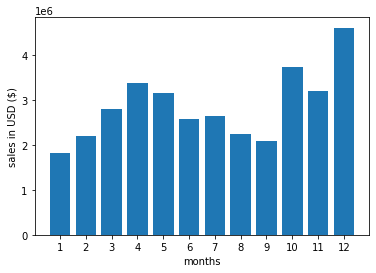

In [14]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,sdf["sales"])
plt.xticks(months)
plt.ylabel("sales in USD ($)")
plt.xlabel("months")
plt.show()

## which city has the highest number of sales

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


###  adding city column

In [16]:
# df["city"] = df["Purchase Address"].apply(lambda x: x.split(",")[0:3:2])
# df.head()

# or another method

def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df["city"] = df["Purchase Address"].apply(lambda x : get_city(x) + " " + get_state(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [17]:
tt=df.groupby("city").sum()
tt["sales"].idxmax()

' San Francisco CA'

In [18]:
tt.loc[[' San Francisco CA']]

,Quantity Ordered,Price Each,Month,sales
city,,,,
San Francisco CA,50239.0,8.211462e+06,315520,8.262204e+06


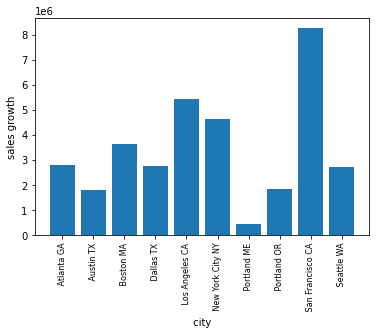

In [19]:
cities = [city for city,gg in df.groupby("city")]
plt.bar(cities,tt["sales"])
plt.xticks(cities,rotation="vertical",size=8)
plt.xlabel(" city ")
plt.ylabel("sales growth")
plt.show()


## what time should we display advertisements to maximise likelihood of cusomers buying products

In [20]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["minutes"] = df["Order Date"].dt.minute
df["hour"] = df["Order Date"].dt.hour

In [28]:
df.groupby("hour").count()["sales"]

hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: sales, dtype: int64

In [26]:
hours = [hour for hour,ff in df.groupby("hour")]
plt.plot(hours,df.groupby("hour").count()["sales"])
plt.xticks(hour)
plt.grid()
plt.xlabel("hours")
plt.ylabel("sales")
plt.show()

NameError: name 'hour' is not defined

## what products are most sold together

In [29]:
ase = df[df["Order ID"].duplicated(keep=False)]
ase["grouped"] = ase.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))
ase = ase[["Order ID","grouped"]].drop_duplicates()
ase.head()

<ipython-input-29-9beb05a15ced>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ase["grouped"] = ase.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))


,Order ID,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in ase["grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

# Q5...WHICH PRODUCT IS SOLD THE MOST AND WHY

In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,minutes,hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,46,8
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,30,22
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,38,14
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,38,14
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,27,9


In [44]:
qua = df.groupby("Product").sum()["Quantity Ordered"].idxmax()
qua

'AAA Batteries (4-pack)'